In [2]:
# python warning off
import warnings
warnings.filterwarnings('ignore')

# tensorflow warning off
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [4]:
# tensorflow 1.x examples 실습

In [5]:
# [털 , 날개] 잇으면 1 없으면 0
x_data = np.array( [ [0,0], [1,0], [1,1], [0,0],[0,0],[0,1]])
# y                  기타    포유류  조류   기타  기타   조류

In [6]:
y_data = np.array([
    [1,0,0], [0,1,0], [0,0,1], [1,0,0],[1,0,0],[0,0,1]
])

In [7]:
X = tf.placeholder(tf.float32)

In [8]:
Y = tf.placeholder(tf.float32)

In [12]:
W1 = tf.Variable(tf.random_uniform([2, 10], -1. , 1.))
# [들어오는 특성(feature)의 개수, 뉴런의 숫자], 왼쪽 경계, 오른쪽 경계 
# -1부터 1까지 균등하게 랜덤 분포

In [13]:
W2 = tf.Variable(tf.random_uniform([10,3], -1.,1.))
# [이전 뉴런의 개수, 나가는 개수.] 텐서플로의 약속이다.   

In [17]:
b1 = tf.Variable(tf.zeros([10]))
# W1의 개수만큼 b1 도 만들어 줘야 해서 10
# 10개 짜리 0 을 만들어준다는 의미 

<tf.Variable 'Variable_7:0' shape=(10,) dtype=float32_ref>


In [20]:
b2 =tf.Variable(tf.zeros([3]))

In [21]:
L1 = tf.add(tf.matmul(X,W1), b1) # X*W1 + b1

In [23]:
L1 = tf.nn.relu(L1)

In [24]:
model = tf.add(tf.matmul(L1, W2), b2) 

In [26]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y, logits=model))

In [27]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)

In [28]:
train_op = optimizer.minimize(cost)

In [29]:
sess = tf.Session()

In [30]:
sess.run(tf.global_variables_initializer()) 
# 초기화

In [31]:
# 반복문을 돌려서 학습시켜준다. 
for step in range(100):
    sess.run(train_op, feed_dict={X: x_data, Y: y_data})
    if(step+1)%10 ==0: #10번 단위로 비용출력 
        print(step+1, sess.run(cost, feed_dict={X: x_data, Y: y_data}))
#feed_dict : 사전을 제공하는 함수

10 0.85478014
20 0.6882488
30 0.55313975
40 0.44251204
50 0.3464333
60 0.26295754
70 0.19406633
80 0.14101486
90 0.10164076
100 0.07410798


In [34]:
prediction = tf.argmax(model,axis=1)

In [35]:
target = tf.argmax(Y, axis=1)

In [41]:
print("prediction:",sess.run(prediction, feed_dict={X:x_data}))
print("target:", sess.run(target, feed_dict={Y:y_data}))

prediction: [0 1 2 0 0 2]
target: [0 1 2 0 0 2]


In [42]:
is_correct = tf.equal(prediction, target)
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [43]:
print("정확도: {:.2f}".format(sess.run(accuracy*100,feed_dict={X: x_data, Y: y_data})))

정확도: 100.00


In [44]:
sess.close()

In [45]:
#tensorflow 1. x mnist example 손글씨 숫자 DNN 실습 

In [46]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [47]:
mnist = input_data.read_data_sets('mnist/data', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting mnist/data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting mnist/data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting mnist/data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting mnist/data\t10k-labels-idx1-ubyte.gz


In [48]:
X = tf.placeholder(tf.float32, [None, 784])
# 데이터의 개수는 아직 지정하지 않아서 None
# 손글씨 데이터 28*28(=784) 이미지를 1차원 으로 핀 것 (DNN 이니까)

In [49]:
Y = tf.placeholder(tf.float32, [None,10])

In [50]:
W1 = tf.Variable(tf.random_normal([784, 256], stddev = 0.01))

In [52]:
L1 = tf.nn.relu(tf.matmul(X, W1))

In [53]:
# model.add(Dense(128, activation = 'relu', input_shape=(784,)))
# 위 Keras 코드와 윗 두줄이 같은 의미 

In [54]:
W2 = tf.Variable(tf.random_normal([256,256], stddev=0.01))

In [55]:
L2 = tf.nn.relu(tf.matmul(L1,W2))

In [56]:
W3 = tf.Variable(tf.random_normal([256,10], stddev=0.01))
#최종 뉴런의 개수는 10개이다. 0~9가 10개 니까 

In [57]:
model = tf.matmul(L2,W3)

In [58]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))

In [59]:
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [60]:
sess = tf.Session()

In [61]:
sess.run( tf.global_variables_initializer() ) 

In [64]:
batch_size = 100 # 한번에 올리는 이미지 100장
total_batch = int(mnist.train.num_examples / batch_size ) # 훈련데이터 개수 / 한번에 올릴 이미지의 양

In [66]:
for epoch in range(15): #학습횟수는 15번
    total_cost = 0 
    for i in range(total_batch): #학습 1번당 550번을 돌린다. 
        batch_xs, batch_ys = mnist.train.next_batch(batch_size) # 100개씩 xs ys에 할당
        _, cost_val = sess.run([optimizer, cost], feed_dict={X:batch_xs, Y:batch_ys})
        # cost만 궁금하다는 뜻
        total_cost += cost_val
    print('epoch : {:04d}, cost : {:.3f}'.format((epoch+1) , (total_cost/total_batch) ))
print("train finish!")

epoch : 0001, cost : 0.010
epoch : 0002, cost : 0.011
epoch : 0003, cost : 0.013
epoch : 0004, cost : 0.004
epoch : 0005, cost : 0.007
epoch : 0006, cost : 0.009
epoch : 0007, cost : 0.008
epoch : 0008, cost : 0.004
epoch : 0009, cost : 0.007
epoch : 0010, cost : 0.011
epoch : 0011, cost : 0.005
epoch : 0012, cost : 0.004
epoch : 0013, cost : 0.005
epoch : 0014, cost : 0.011
epoch : 0015, cost : 0.004
train finish!


In [67]:
# model.fit(x_train, y_train, epochs=15, batch_size=100)

In [68]:
# tqdm example

In [69]:
from tqdm import trange
from time import sleep

for i in trange(100):
    sleep(0.01)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 91.07it/s]


In [70]:
from tqdm import trange

#for epoch in range(15):
for epoch in trange(15):
    total_cost = 0
    for i in range(total_batch):  # 550
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost], feed_dict={X:batch_xs, Y:batch_ys})
        total_cost += cost_val
    print('epoch: {:04d}, cost: {:.3f}'.format((epoch+1), (total_cost/total_batch)))
print("train finish!")

  7%|█████▌                                                                             | 1/15 [00:00<00:12,  1.10it/s]

epoch: 0001, cost: 0.004


 13%|███████████                                                                        | 2/15 [00:01<00:11,  1.18it/s]

epoch: 0002, cost: 0.008


 20%|████████████████▌                                                                  | 3/15 [00:02<00:09,  1.23it/s]

epoch: 0003, cost: 0.007


 27%|██████████████████████▏                                                            | 4/15 [00:03<00:08,  1.26it/s]

epoch: 0004, cost: 0.005


 33%|███████████████████████████▋                                                       | 5/15 [00:03<00:07,  1.30it/s]

epoch: 0005, cost: 0.004


 40%|█████████████████████████████████▏                                                 | 6/15 [00:04<00:06,  1.35it/s]

epoch: 0006, cost: 0.007


 47%|██████████████████████████████████████▋                                            | 7/15 [00:05<00:05,  1.39it/s]

epoch: 0007, cost: 0.004


 53%|████████████████████████████████████████████▎                                      | 8/15 [00:05<00:04,  1.43it/s]

epoch: 0008, cost: 0.004


 60%|█████████████████████████████████████████████████▊                                 | 9/15 [00:06<00:04,  1.43it/s]

epoch: 0009, cost: 0.007


 67%|██████████████████████████████████████████████████████▋                           | 10/15 [00:07<00:03,  1.41it/s]

epoch: 0010, cost: 0.005


 73%|████████████████████████████████████████████████████████████▏                     | 11/15 [00:07<00:02,  1.41it/s]

epoch: 0011, cost: 0.003


 80%|█████████████████████████████████████████████████████████████████▌                | 12/15 [00:08<00:02,  1.45it/s]

epoch: 0012, cost: 0.007


 87%|███████████████████████████████████████████████████████████████████████           | 13/15 [00:09<00:01,  1.46it/s]

epoch: 0013, cost: 0.006


 93%|████████████████████████████████████████████████████████████████████████████▌     | 14/15 [00:09<00:00,  1.45it/s]

epoch: 0014, cost: 0.002


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:10<00:00,  1.41it/s]

epoch: 0015, cost: 0.003
train finish!


In [71]:
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))

In [72]:
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [73]:
print("test 정확도: {:.3f}".format(sess.run(accuracy, feed_dict={X:mnist.test.images,
                                                         Y:mnist.test.labels})))

test 정확도: 0.983


In [74]:
sess.close()

In [75]:
# tensorflow 1.x, mnist DNN , Dropout 적용

In [76]:
# python warning off
import warnings
warnings.filterwarnings('ignore')

# tensorflow warning off
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [77]:
from tensorflow.examples.tutorials.mnist import input_data

In [78]:
mnist = input_data.read_data_sets('mnist/data', one_hot=True)

Extracting mnist/data\train-images-idx3-ubyte.gz
Extracting mnist/data\train-labels-idx1-ubyte.gz
Extracting mnist/data\t10k-images-idx3-ubyte.gz
Extracting mnist/data\t10k-labels-idx1-ubyte.gz


In [79]:
X = tf.placeholder(tf.float32, [None, 784])

In [80]:
Y = tf.placeholder(tf.float32, [None, 10])

In [81]:
keep_prob = tf.placeholder(tf.float32)

In [82]:
W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))

In [83]:
L1 = tf.nn.relu(tf.matmul(X, W1))  # layer 1, 1층

In [84]:
L1 = tf.nn.dropout(L1, keep_prob)

In [85]:
W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))

In [86]:
L2 = tf.nn.relu(tf.matmul(L1, W2))  # layer 2, 2층

In [87]:
L2 = tf.nn.dropout(L2, keep_prob)

In [88]:
W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))

In [89]:
model = tf.matmul(L2, W3)  # layer 3, 3층 ==> model

In [90]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model,labels=Y))

In [91]:
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [92]:
sess = tf.Session()

In [93]:
sess.run( tf.global_variables_initializer() )

In [94]:
batch_size = 100

In [95]:
total_batch = int( mnist.train.num_examples / batch_size )  # 55000 / 100 ==> 550

In [96]:
from tqdm import trange

In [97]:
for epoch in trange(30):
    total_cost = 0
    for i in range(total_batch):  # 550
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost],
                              feed_dict={X:batch_xs, Y:batch_ys, keep_prob: 0.8})

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:27<00:00,  1.08it/s]


In [98]:
is_correct = tf.equal(tf.argmax(model,1), tf.argmax(Y,1))

In [100]:
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [101]:
print("print acc : {:.2f}".format(
    sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels, keep_prob:1})))

print acc : 0.98


In [102]:
labels = sess.run(model, 
                 feed_dict={X:mnist.test.images, 
                            Y:mnist.test.labels, 
                            keep_prob:1})


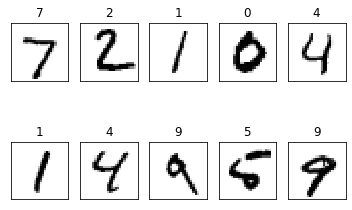

In [104]:
fig = plt.figure()
for i in range(10):
    subplot = fig.add_subplot(2, 5, i+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    #subplot.set_title('{:d}'.format(np.argmax(labels[i])))
    subplot.set_title(f'{np.argmax(labels[i]):d}')
    subplot.imshow(mnist.test.images[i].reshape((28, 28)), cmap=plt.cm.gray_r)
plt.show()

In [105]:
#

In [177]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [178]:
from tensorflow.examples.tutorials.mnist import input_data

In [179]:
mnist = input_data.read_data_sets("mnist/data", one_hot=True)

Extracting mnist/data\train-images-idx3-ubyte.gz
Extracting mnist/data\train-labels-idx1-ubyte.gz
Extracting mnist/data\t10k-images-idx3-ubyte.gz
Extracting mnist/data\t10k-labels-idx1-ubyte.gz


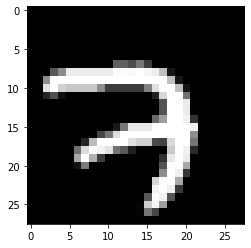

In [180]:
plt.imshow(mnist.train.images[0].reshape((28,28)), cmap=plt.cm.gray)

In [181]:
np.set_printoptions(linewidth=1000)

In [182]:
X = tf.placeholder(tf.float32, [None, 28, 28,1]) # CNN 이기 때문에 가로, 세로 , 

In [183]:
Y = tf.placeholder(tf.float32, [None,10])

In [184]:
keep_prob = tf.placeholder(tf.float32)

In [185]:
# 3 by 3 filters , gray, 32 filters
W1 = tf.Variable(tf.random_normal([3,3,1,32], stddev=0.01))

In [186]:
from tensorflow import nn 

In [187]:
L1 = nn.conv2d(X, W1, strides=[1,1,1,1], padding='SAME')

In [188]:
L1 = nn.relu(L1)

In [189]:
L1 = nn.max_pool(L1,ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [190]:
# 3 by 3 filters , gray, 32 filters
W2 = tf.Variable(tf.random_normal([3,3,32,64], stddev=0.01))

In [191]:
L2 = nn.conv2d(L1,W2, strides=[1,1,1,1], padding='SAME')

In [192]:
L2 = nn.relu(L2)

In [193]:
L2 = nn.max_pool(L2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [194]:
L2 = nn.dropout(L2, keep_prob)

In [195]:
W3 = tf.Variable(tf.random_normal([7*7*64, 256], stddev=0.01))

In [196]:
 W3.shape
# W2.shape

TensorShape([Dimension(3136), Dimension(256)])

In [197]:
L3 = tf.reshape(L2,[-1,7*7*64])

In [198]:
L3 = tf.matmul(L3,W3)

In [199]:
L3 = nn.relu(L3)

In [200]:
L3=nn.dropout(L3, keep_prob)

In [201]:
W4 = tf.Variable(tf.random_normal([256,10], stddev=0.01))

In [202]:
# 케라스 코드와 비교해보기
# model = Sequential()

# # 첫번째
# model.add(Conv2D(32,(3,3), activation='relu', padding= 'same', input_shape=(28,28,1)))
# # 32 filters(3 by 3)
# model.add(Conv2D(32,(3,3), activation = 'relu', padding ='same'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# # 두번 conv 후 풀링(2,2)
# model.add(Dropout(0.25))
# # overfitting 방지 Dropout

# # 두번째
# model.add(Conv2D(64,(3,3), activation='relu', padding= 'same'))
# # 32 filters(3 by 3)
# model.add(Conv2D(64,(3,3), activation = 'relu', padding ='same'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# # 두번 conv 후 풀링(2,2)
# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(123, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(10, activation='softmax'))

In [203]:
W4 = tf.Variable(tf.random_normal([256,10], stddev=0.01))

In [204]:
model = tf.matmul(L3,W4)

In [205]:
cost = tf.reduce_mean(nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))

In [206]:
sess = tf.Session()

In [207]:
sess.run(tf.global_variables_initializer())

In [208]:
batch_size=100

In [209]:
total_batch = int( mnist.train.num_examples / batch_size) #55000 / 100 => 550

In [210]:
from tqdm import trange

In [216]:
# for epoch in trange(15):
#     total_cost = 0 
#     for i in range(total_batch) : # batch
#         batch_xs, batch_ys = mnist.train.next_batch(batch_size)
#         batch_xs = batch_xs.reshape(-1,28,28,1)
#         _, cost_val = sess.run([optimizer, cost], feed_dict={X:batch_xs, Y:batch_ys, keep_prob:0.7}) # 30% dropout
#         total_cost += total_cost
#     print(f"epoch : {epoch:04d} avg. cost: {(total_cost/total_batch):.3f}")
# print("train finish!")

# %%time
for epoch in trange(15):
    total_cost = 0
    for i in range(total_batch): # 550
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        batch_xs = batch_xs.reshape(-1, 28, 28, 1)
        _, cost_val = sess.run([optimizer, cost],
                              feed_dict={X:batch_xs, Y:batch_ys, keep_prob:0.7})
        total_cost += cost_val
    print(f"epoch : {epoch:04d} avg. cost: {(total_cost/total_batch):.3f}")
print("train finish!!!")
# epoch : 0014 avg. cost: 0.028
# train finish!!!

  0%|                                                                                           | 0/15 [00:00<?, ?it/s]


InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_6' with dtype float
	 [[node Placeholder_6 (defined at <ipython-input-81-287c4eac6854>:1) ]]

Original stack trace for 'Placeholder_6':
  File "C:\Users\User\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\User\anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\User\anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\User\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 583, in start
    self.io_loop.start()
  File "C:\Users\User\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 153, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\User\anaconda3\lib\asyncio\base_events.py", line 538, in run_forever
    self._run_once()
  File "C:\Users\User\anaconda3\lib\asyncio\base_events.py", line 1782, in _run_once
    handle._run()
  File "C:\Users\User\anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\Users\User\anaconda3\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\Users\User\anaconda3\lib\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "C:\Users\User\anaconda3\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "C:\Users\User\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 377, in dispatch_queue
    yield self.process_one()
  File "C:\Users\User\anaconda3\lib\site-packages\tornado\gen.py", line 225, in wrapper
    runner = Runner(result, future, yielded)
  File "C:\Users\User\anaconda3\lib\site-packages\tornado\gen.py", line 714, in __init__
    self.run()
  File "C:\Users\User\anaconda3\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "C:\Users\User\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 361, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\User\anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\User\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\User\anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\User\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 541, in execute_request
    user_expressions, allow_stdin,
  File "C:\Users\User\anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 300, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\User\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2858, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2886, in _run_cell
    return runner(coro)
  File "C:\Users\User\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3063, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3254, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-81-287c4eac6854>", line 1, in <module>
    keep_prob = tf.placeholder(tf.float32)
  File "C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\ops\array_ops.py", line 2143, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 6261, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3616, in create_op
    op_def=op_def)
  File "C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2005, in __init__
    self._traceback = tf_stack.extract_stack()


In [217]:
# python warning off
import warnings
warnings.filterwarnings('ignore')

# tensorflow warning off
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [218]:
from tensorflow.examples.tutorials.mnist import input_data

In [219]:
mnist = input_data.read_data_sets('mnist/data', one_hot=True)

Extracting mnist/data\train-images-idx3-ubyte.gz
Extracting mnist/data\train-labels-idx1-ubyte.gz
Extracting mnist/data\t10k-images-idx3-ubyte.gz
Extracting mnist/data\t10k-labels-idx1-ubyte.gz


In [220]:
mnist.test.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [221]:
learning_rate = 0.01
train_epoch = 20
batch_size = 100
n_hidden = 256
n_input = 28 * 28

In [222]:
X = tf.placeholder(tf.float32, [None, n_input])

In [223]:
W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))  # [784, 256]

In [224]:
b_encode = tf.Variable(tf.random_normal([n_hidden]))  # 256

In [225]:
from tensorflow import nn

In [226]:
encoder = nn.sigmoid(tf.add(tf.matmul(X, W_encode), b_encode))

In [227]:
W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))

In [228]:
b_decode = tf.Variable(tf.random_normal([n_input]))

In [229]:
model = nn.sigmoid(tf.add(tf.matmul(encoder, W_decode), b_decode)) #XW+b => sigmoid

In [230]:
cost = tf.reduce_mean(tf.pow(X - model,2)) #MSE pow 는 제곱

In [231]:
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

In [232]:
sess=tf.Session()

In [233]:
sess.run(tf.global_variables_initializer())

In [234]:
total_batch = int( mnist.train.num_examples / batch_size) 

In [235]:
from tqdm import trange

In [237]:
%%time
for epoch in trange(train_epoch):
    total_cost = 0 
    for i in range(total_batch): # 550
        batch_xs, batch_ys = mnist.train.next_batch(batch_size) #100
        _, cost_val = sess.run([optimizer, cost], feed_dict={X:batch_xs})
        total_cost += total_cost
    print(f"epoch: {(epoch+1):04d} avg. cost: {(total_cost/total_batch):.3f}")
    
print("train finish")

  5%|████▏                                                                              | 1/20 [00:01<00:19,  1.03s/it]

epoch: 0001 avg. cost: 0.000


 10%|████████▎                                                                          | 2/20 [00:02<00:18,  1.04s/it]

epoch: 0002 avg. cost: 0.000


 15%|████████████▍                                                                      | 3/20 [00:03<00:17,  1.05s/it]

epoch: 0003 avg. cost: 0.000


 20%|████████████████▌                                                                  | 4/20 [00:04<00:17,  1.09s/it]

epoch: 0004 avg. cost: 0.000


 25%|████████████████████▊                                                              | 5/20 [00:05<00:16,  1.09s/it]

epoch: 0005 avg. cost: 0.000


 30%|████████████████████████▉                                                          | 6/20 [00:06<00:15,  1.10s/it]

epoch: 0006 avg. cost: 0.000


 35%|█████████████████████████████                                                      | 7/20 [00:07<00:14,  1.09s/it]

epoch: 0007 avg. cost: 0.000


 40%|█████████████████████████████████▏                                                 | 8/20 [00:08<00:12,  1.07s/it]

epoch: 0008 avg. cost: 0.000


 45%|█████████████████████████████████████▎                                             | 9/20 [00:09<00:11,  1.07s/it]

epoch: 0009 avg. cost: 0.000


 50%|█████████████████████████████████████████                                         | 10/20 [00:10<00:10,  1.06s/it]

epoch: 0010 avg. cost: 0.000


 55%|█████████████████████████████████████████████                                     | 11/20 [00:11<00:09,  1.09s/it]

epoch: 0011 avg. cost: 0.000


 60%|█████████████████████████████████████████████████▏                                | 12/20 [00:13<00:08,  1.11s/it]

epoch: 0012 avg. cost: 0.000


 65%|█████████████████████████████████████████████████████▎                            | 13/20 [00:14<00:07,  1.10s/it]

epoch: 0013 avg. cost: 0.000


 70%|█████████████████████████████████████████████████████████▍                        | 14/20 [00:15<00:06,  1.09s/it]

epoch: 0014 avg. cost: 0.000


 75%|█████████████████████████████████████████████████████████████▌                    | 15/20 [00:16<00:05,  1.08s/it]

epoch: 0015 avg. cost: 0.000


 80%|█████████████████████████████████████████████████████████████████▌                | 16/20 [00:17<00:04,  1.10s/it]

epoch: 0016 avg. cost: 0.000


 85%|█████████████████████████████████████████████████████████████████████▋            | 17/20 [00:18<00:03,  1.11s/it]

epoch: 0017 avg. cost: 0.000


 90%|█████████████████████████████████████████████████████████████████████████▊        | 18/20 [00:19<00:02,  1.12s/it]

epoch: 0018 avg. cost: 0.000


 95%|█████████████████████████████████████████████████████████████████████████████▉    | 19/20 [00:20<00:01,  1.13s/it]

epoch: 0019 avg. cost: 0.000


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:21<00:00,  1.10s/it]

epoch: 0020 avg. cost: 0.000
train finish
Wall time: 21.9 s
